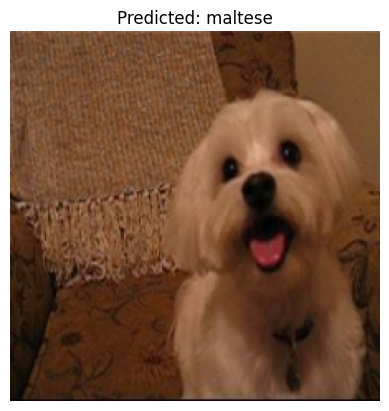

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import os
from glob import iglob
from collections import Counter


def most_frequent(labels):
    return max(set(labels), key=labels.count)


def predictLabelKNN(x_train_flatten, y_train, img, k=3):
    predictedLabel = -1
    predictions = []  

    for idx, imgT in enumerate(x_train_flatten):
        difference = (img - imgT) ** 2
        score = math.sqrt(np.sum(difference))
        predictions.append((score, y_train[idx]))
        
    predictions = sorted(predictions, key=lambda x: x[0])  
    predictions = predictions[:k] 
    predLabels = [p[1] for p in predictions]
    
    predictedLabel = most_frequent(predLabels)

    return predictedLabel

dict_classes = {0: "doberman", 1: "maltese", 2: "newfoundland", 3: "redbone"}

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, target_size)
    img_flattened = img_resized.flatten()  
    return img_resized, img_flattened

def load_dataset(base_folder, folders, target_size=(224, 224)):
    x_train_flatten = []
    y_train = []
    for class_id, folder in enumerate(folders):
        folder_path = os.path.join(base_folder, folder)
        for path in iglob(os.path.join(folder_path, '*.jpg')):
            img_resized, img_flattened = load_and_preprocess_image(path, target_size)
            x_train_flatten.append(img_flattened)
            y_train.append(class_id)  

    return np.array(x_train_flatten), np.array(y_train)

base_folder = 'reduced_dataset'
folders = ['doberman', 'maltese', 'newfoundland', 'redbone']  

x_train_flatten, y_train = load_dataset(base_folder, folders)

image_path = 'n02085936_4894.jpg' # maltese
img_resized, img_flattened = load_and_preprocess_image(image_path)

predicted_label = predictLabelKNN(x_train_flatten, y_train, img_flattened, k=3)

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off') 
plt.show()